# Телекоммуникации: Прогноз оттока клиентов

# План  работы




### Описать предметную область

### Ознакомиться с данными

* Выгрузить данные
* Оценить данные
* Провести предобработку (изменить типы, добавить новые признаки, выделить целевой)

### Провести исследовательский анализ данных

* прогнать pandas_profiling 
* подробнее рассмотреть зависимости на графиках
* рассмоотреть категориальные признаки с помощью phik 

### Выбрать и обучить модель

* Подготовить и разделить данные для обучения модели (train_test_split,OrdinalEncoder) 
* Выбрать модель с подобранными гиперпараметрами (CatBoostClassifier,RandomForestClassifier,RandomForestClassifier,GridSearchCV)

### Протестировать модель

* Оценить результаты (aaccuracy_score,roc_auc_score,f1_score), построить ROC-кривую\
* Проанализировать важность параметров
* Посмотреть матрицу ошибок

## Описание предметной области

### Информация о заказчике

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг предоставляемых заказчиком

<b>Основные услуги</b>

* Стационарная телефонная связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
* Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

<b>Дополнительные виды услуг</b>

* Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity).
* Выделенная линия технической поддержки (TechSupport)
* Облачное хранилище файлов для резервного копирования данных (OnlineBackup)
* Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

### Описание имеющихся данных

* contract_new.csv — информация о договоре;
* personal_new.csv — персональные данные клиента;
* internet_new.csv — информация об интернет-услугах;
* phone_new.csv — информация об услугах телефонии.

## Ознакомление с данными

In [2]:
pip install pandas_profiling

     |████████████████████████████████| 324 kB 862 kB/s eta 0:00:01
     |████████████████████████████████| 356 kB 16.2 MB/s eta 0:00:01
     |████████████████████████████████| 679 kB 68.5 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 70.5 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 41.5 MB/s eta 0:00:01
     |████████████████████████████████| 460 kB 74.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 42.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 40.3 MB/s eta 0:00:01     |██▍                             | 153 kB 40.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 82.2 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=5fb624a817583225f0cb3745d9e3cf41976748511cb83751b8d28f40bd0deebb
  Stored in directory: /home/jovyan/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
Note: you may need

In [ ]:
#Код ревьюера
# !pip install scikit-learn==1.1.3

In [1]:
!pip install scikit-learn==1.1.3

     |████████████████████████████████| 30.8 MB 45 kB/s  eta 0:00:012   |█████▍                          | 5.2 MB 7.9 MB/s eta 0:00:04     |███████▌                        | 7.2 MB 7.9 MB/s eta 0:00:03     |████████▏                       | 7.9 MB 7.9 MB/s eta 0:00:03     |█████████                       | 8.6 MB 11.0 MB/s eta 0:00:03     |█████████████████               | 16.4 MB 11.0 MB/s eta 0:00:02
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [3]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [4]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import phik
import seaborn as sns
import phik
from phik import report
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

/tmp/ipykernel_30/1176160737.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


### Загрузка датасетов

In [5]:
data_internet = pd.read_csv('/datasets/internet_new.csv')
data_personal = pd.read_csv('/datasets/personal_new.csv')
data_phone = pd.read_csv('/datasets/phone_new.csv')
data_contract = pd.read_csv('/datasets/contract_new.csv')

### Оценка данных

In [6]:
#Функция для просмотра информации о датафреймах

def introduction(data):
    print(data.head())
    print(data.info())
    print(data.describe())
    

In [7]:
introduction(data_contract)

   customerID   BeginDate EndDate            Type PaperlessBilling  \
0  7590-VHVEG  2020-01-01      No  Month-to-month              Yes   
1  5575-GNVDE  2017-04-01      No        One year               No   
2  3668-QPYBK  2019-10-01      No  Month-to-month              Yes   
3  7795-CFOCW  2016-05-01      No        One year               No   
4  9237-HQITU  2019-09-01      No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges  
0           Electronic check           29.85        31.04  
1               Mailed check           56.95      2071.84  
2               Mailed check           53.85       226.17  
3  Bank transfer (automatic)           42.30       1960.6  
4           Electronic check           70.70        353.5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID    

In [8]:
introduction(data_internet)

   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   

In [9]:
introduction(data_personal)

   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None
       SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000


In [10]:
introduction(data_phone)

   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None
        customerID MultipleLines
count         6361          6361
unique        6361             2
top     7776-QWNFX            No
freq             1          3390


Количество строк совпадает не во всех данных, это вызовет пропуски, но последущее ознакомление лучше продолжить, после их слияния про столбцу customerID

In [11]:
data = data_contract.merge(data_personal, on='customerID')
data = data.merge(data_internet, on='customerID', how='left')
data = data.merge(data_phone, on='customerID', how='left')

In [12]:
introduction(data)

   customerID   BeginDate EndDate            Type PaperlessBilling  \
0  7590-VHVEG  2020-01-01      No  Month-to-month              Yes   
1  5575-GNVDE  2017-04-01      No        One year               No   
2  3668-QPYBK  2019-10-01      No  Month-to-month              Yes   
3  7795-CFOCW  2016-05-01      No        One year               No   
4  9237-HQITU  2019-09-01      No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges  gender  \
0           Electronic check           29.85        31.04  Female   
1               Mailed check           56.95      2071.84    Male   
2               Mailed check           53.85       226.17    Male   
3  Bank transfer (automatic)           42.30       1960.6    Male   
4           Electronic check           70.70        353.5  Female   

   SeniorCitizen Partner Dependents InternetService OnlineSecurity  \
0              0     Yes         No             DSL             No   
1              0      No

### Предобработка данных

Появившиеся пропуски можно заменить на No, т.к. если у пользователя не подключен интернет или телефон, то и соответствующими услугами он не пользуется.

In [13]:
data = data.fillna('No')

В нашем распоряжении 20 столбцов, в столбцах TotalCharges(изменить на float32), SeniorCitizen(изменить на object), BeginDate и EndDate (изменить на datetime) лучше изменить тип данных.

In [14]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", 0).astype('float32')

In [15]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

Перед изменением типа данных, проверим даты на корректность.

In [16]:
data['EndDate'].unique()

array(['No', '2017-05-01', '2016-03-01', '2018-09-01', '2018-11-01',
       '2018-12-01', '2019-08-01', '2018-07-01', '2017-09-01',
       '2015-09-01', '2016-07-01', '2016-06-01', '2018-03-01',
       '2019-02-01', '2018-06-01', '2019-06-01', '2020-01-01',
       '2019-11-01', '2016-09-01', '2015-06-01', '2016-12-01',
       '2019-05-01', '2019-04-01', '2017-06-01', '2017-08-01',
       '2018-04-01', '2018-08-01', '2018-02-01', '2019-07-01',
       '2015-12-01', '2014-06-01', '2018-10-01', '2019-01-01',
       '2017-07-01', '2017-12-01', '2018-05-01', '2015-11-01',
       '2019-10-01', '2019-03-01', '2016-02-01', '2016-10-01',
       '2018-01-01', '2017-11-01', '2015-10-01', '2019-12-01',
       '2015-07-01', '2017-04-01', '2015-02-01', '2017-03-01',
       '2016-05-01', '2016-11-01', '2015-08-01', '2019-09-01',
       '2017-10-01', '2017-02-01', '2016-08-01', '2016-04-01',
       '2015-05-01', '2014-09-01', '2014-10-01', '2017-01-01',
       '2015-03-01', '2015-01-01', '2016-01-01', 

In [17]:
data['BeginDate'].unique()

array(['2020-01-01', '2017-04-01', '2019-10-01', '2016-05-01',
       '2019-09-01', '2019-03-01', '2018-04-01', '2019-04-01',
       '2017-07-01', '2014-12-01', '2019-01-01', '2018-10-01',
       '2015-04-01', '2015-09-01', '2018-01-01', '2014-05-01',
       '2015-10-01', '2014-03-01', '2018-05-01', '2019-11-01',
       '2019-02-01', '2016-01-01', '2017-08-01', '2015-12-01',
       '2014-02-01', '2018-06-01', '2019-12-01', '2017-11-01',
       '2019-06-01', '2016-04-01', '2017-02-01', '2018-12-01',
       '2014-04-01', '2018-09-01', '2014-11-01', '2016-07-01',
       '2015-02-01', '2018-07-01', '2014-08-01', '2016-03-01',
       '2018-08-01', '2014-10-01', '2015-06-01', '2016-08-01',
       '2019-05-01', '2017-03-01', '2016-02-01', '2017-09-01',
       '2014-09-01', '2017-12-01', '2016-12-01', '2017-06-01',
       '2015-05-01', '2016-10-01', '2016-09-01', '2019-08-01',
       '2019-07-01', '2017-05-01', '2017-10-01', '2014-07-01',
       '2018-03-01', '2015-01-01', '2018-11-01', '2015-

Данные корректны, в столбце EndDate  на место значения No поставим 2020-02-01 00:00:00 (дата получения информации)

In [18]:
data['EndDate'].value_counts()

No            5942
2020-01-01      39
2019-12-01      38
2018-11-01      35
2019-09-01      32
              ... 
2015-04-01       2
2014-12-01       2
2014-06-01       1
2014-11-01       1
2014-10-01       1
Name: EndDate, Length: 67, dtype: int64

In [19]:
data.loc[(data['EndDate'] == 'No'),'EndDate'] = '2020-02-01 00:00:00'
data['EndDate'] = pd.to_datetime(data['EndDate'],format= "%Y/%m/%d")
data['BeginDate'] = pd.to_datetime(data['BeginDate'],format= "%Y/%m/%d")

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float32       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   object        
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

Поступившие данные в корректном отображении представленны: 16 категориальных, 2 числовых и 2 с датой столбца.

In [21]:
data['customerID'].duplicated().sum()

0

Добавим признак, продолжительность обслуживания.

In [22]:
data['Duration']=(data['EndDate']-data['BeginDate']).dt.days

Повторяющихся клиентов нет

Создадим определяющий столбец target, сделаем его категориальным действующий клиент или нет.

In [23]:
data['EndDate'].unique()

array(['2020-02-01T00:00:00.000000000', '2017-05-01T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2018-09-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2019-08-01T00:00:00.000000000', '2018-07-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2015-09-01T00:00:00.000000000',
       '2016-07-01T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2018-06-01T00:00:00.000000000', '2019-06-01T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000', '2019-11-01T00:00:00.000000000',
       '2016-09-01T00:00:00.000000000', '2015-06-01T00:00:00.000000000',
       '2016-12-01T00:00:00.000000000', '2019-05-01T00:00:00.000000000',
       '2019-04-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-08-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2018-08-01T00:00:00.000000000', '2018-02-01

In [24]:
date = datetime.date(2020, 2, 1)
def client_outflow(enddate):
    if enddate == date:
        return 1
    else:
        return 0

data['Target'] = data['EndDate'].apply(client_outflow)

In [25]:
data['Target'].value_counts()

1    5942
0    1101
Name: Target, dtype: int64

## Исследовательский анализ данных

### Автоматическая оценка

In [26]:
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Разберем автоматический анализ

* BeginDate - после падения количества новых клиентов в 2014 году, идет плавный рост новых договоров.
* EndDate -  рассмотрим самостоятельно
* Type - Большинство (55%) выбрали ежемесечную оплату, тех кто заключает договор на год-два практически равное колличество
* PaperlessBilling не очень понятный критерий
* PaymentMethod - 33% расплачивается при помощи онлайн платежа, офлайн платеж, банковский перевод и автоплатеж скарты разделили 66% поровну.
* Значимая часть клиентов предпочитае дешевые услуги в районе 20 долларов, потом идет нормальное распределение по оплате от 40 до 120 долларов.
* Мужчин и женщин поровну
* Большинство клиентов не пенсионеры
* Примерно половина клиентов  браке
* Больше 2/3 клиентов не имеет детей
* Типы услуг расписывать смысла не вижу

Явной корреляции с главным признаком не наблюдается, но самая заметная с общей затраченной суммой, месячным платежом и продолжительностью обслуживания.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float32       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   object        
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

### Более подробная(наглядная) оценка зависимости

Думаю можно так же рассмотреть распределение признаков с разделением на ушедших и активных клиентов, картина станет более четкой.

In [28]:
list_category = []
for i in data.columns:
        list_category.append(i)

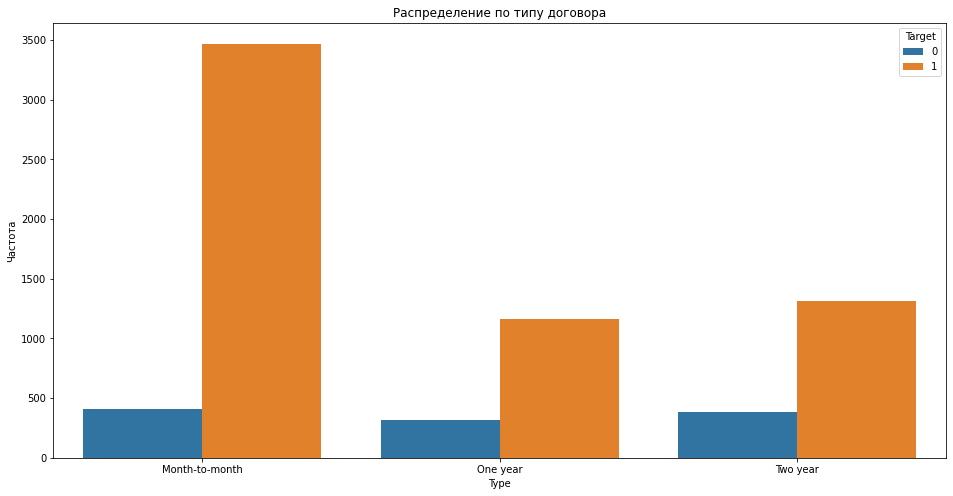

In [29]:
plt.figure(figsize=(16,8))
sns.countplot(data=data,x='Type',hue='Target')
plt.ylabel('Частота')
plt.xlabel('Type')
plt.title(f'Распределение по типу договора')
plt.show();

Доля ушедших среди платящих ежемесячно ниже всего.

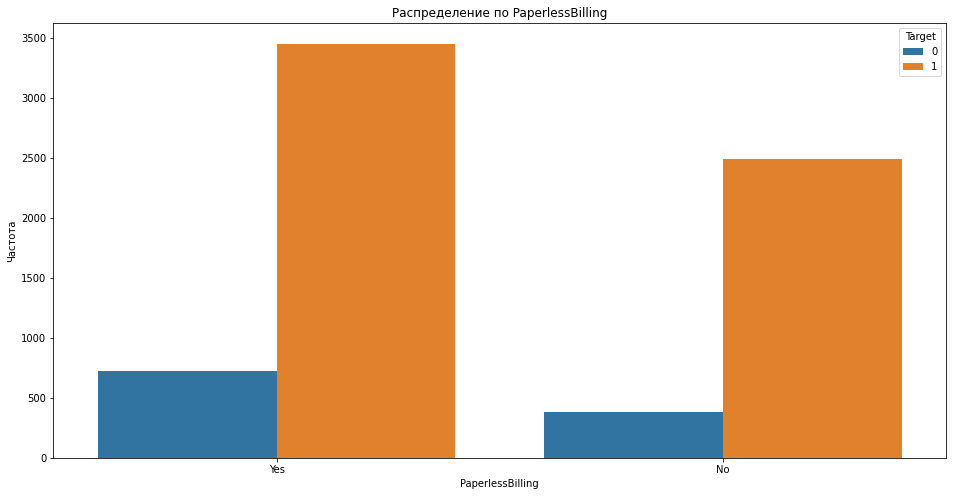

In [30]:
plt.figure(figsize=(16,8))
sns.countplot(data=data,x='PaperlessBilling',hue='Target')
plt.ylabel('Частота')
plt.xlabel('PaperlessBilling')
plt.title(f'Распределение по PaperlessBilling')
plt.show();

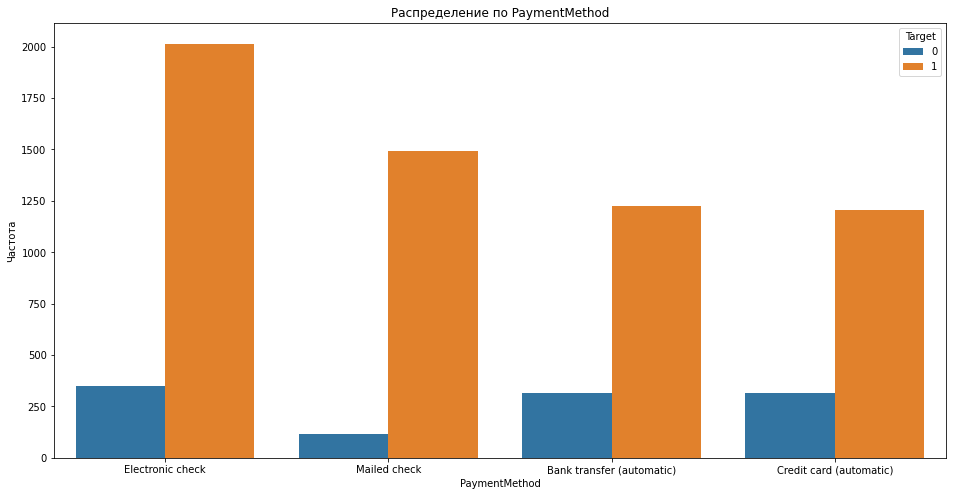

In [31]:
plt.figure(figsize=(16,8))
sns.countplot(data=data,x='PaymentMethod',hue='Target')
plt.ylabel('Частота')
plt.xlabel('PaymentMethod')
plt.title(f'Распределение по PaymentMethod')
plt.show();

Среди тех кто расплачивается автоматически доля уходов выше.

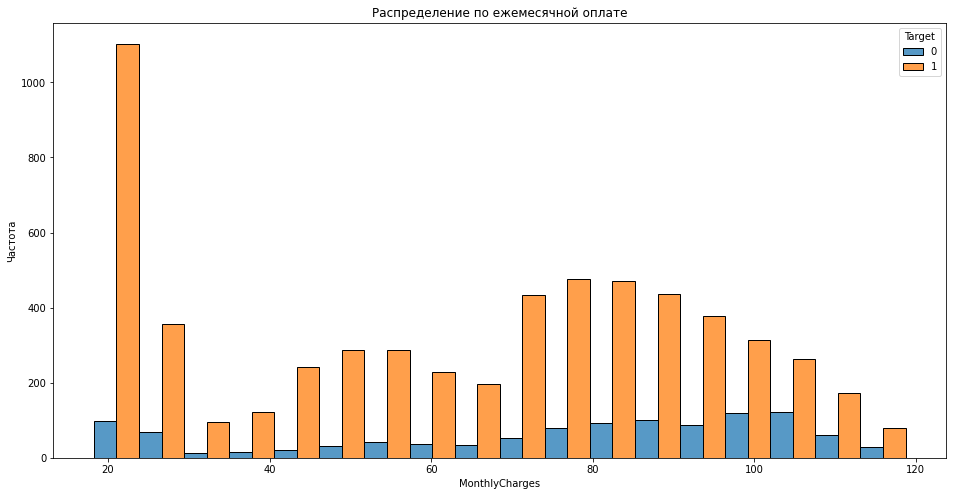

In [32]:
plt.figure(figsize=(16,8))
sns.histplot(data=data,x='MonthlyCharges',hue='Target', multiple="dodge")
plt.ylabel('Частота')
plt.xlabel('MonthlyCharges')
plt.title(f'Распределение по ежемесячной оплате')
plt.show();

В более дорогих услугах разочаруются чаще.

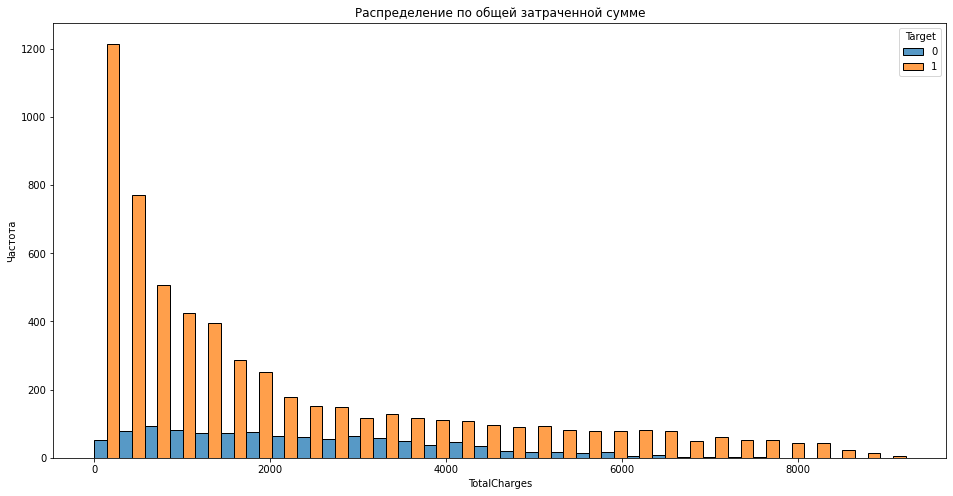

In [33]:
plt.figure(figsize=(16,8))
sns.histplot(data=data,x='TotalCharges',hue='Target', multiple="dodge")
plt.ylabel('Частота')
plt.xlabel('TotalCharges')
plt.title(f'Распределение по общей затраченной сумме')
plt.show();

Четких закономерностей нет, понятно одно новые клиенты редко сразу уходят.

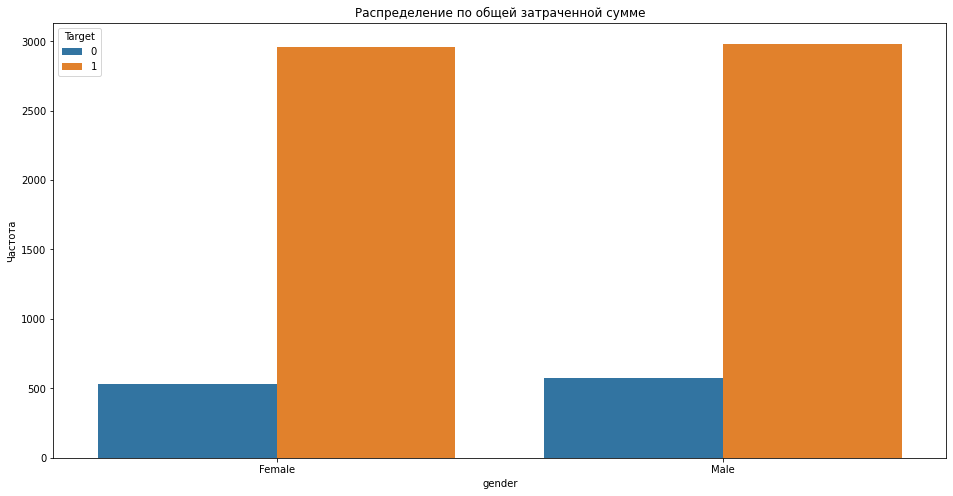

In [34]:
plt.figure(figsize=(16,8))
sns.countplot(data=data,x='gender',hue='Target')
plt.ylabel('Частота')
plt.xlabel('gender')
plt.title(f'Распределение по общей затраченной сумме')
plt.show();

Мужчины и женщины равны!

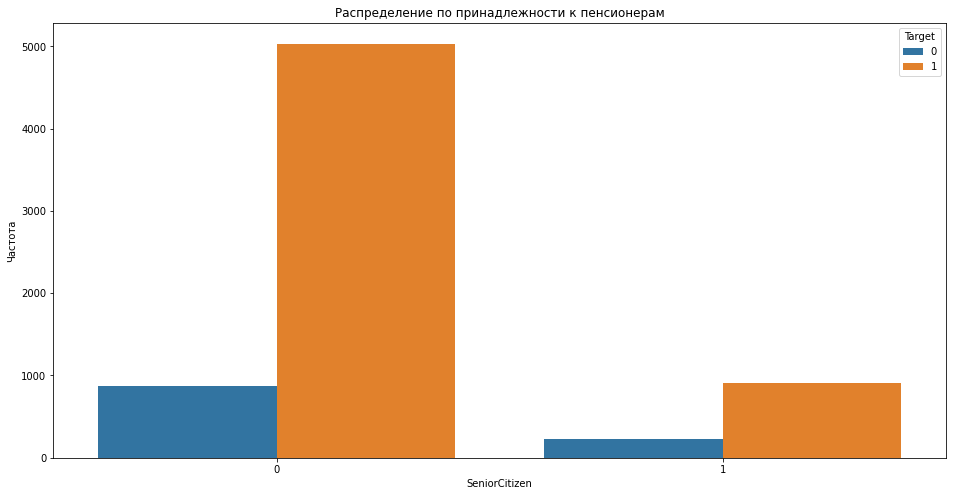

In [35]:
plt.figure(figsize=(16,8))
sns.countplot(data=data,x='SeniorCitizen',hue='Target')
plt.ylabel('Частота')
plt.xlabel('SeniorCitizen')
plt.title(f'Распределение по принадлежности к пенсионерам')
plt.show();

Доля ушедших примерно равна

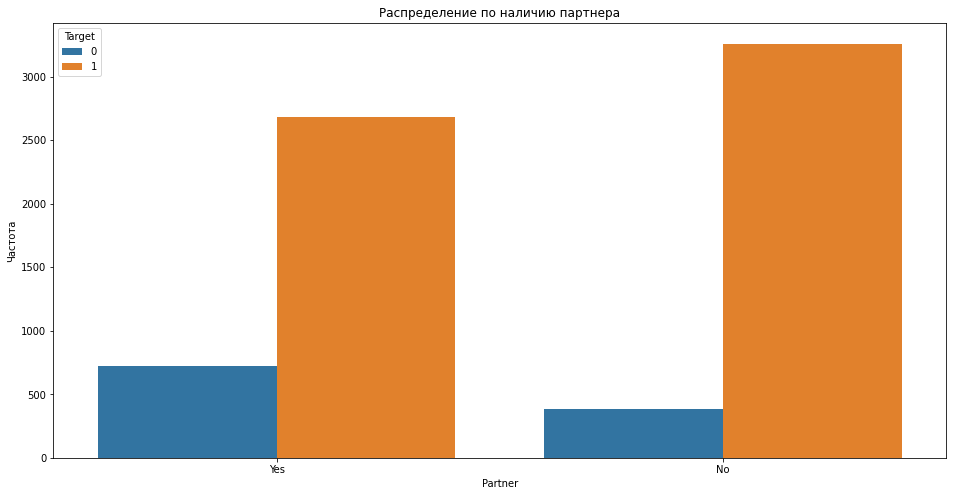

In [36]:
plt.figure(figsize=(16,8))
sns.countplot(data=data,x='Partner',hue='Target')
plt.ylabel('Частота')
plt.xlabel('Partner')
plt.title(f'Распределение по наличию партнера')
plt.show();

Люди состоящие в браке чаще отказываются от услуг

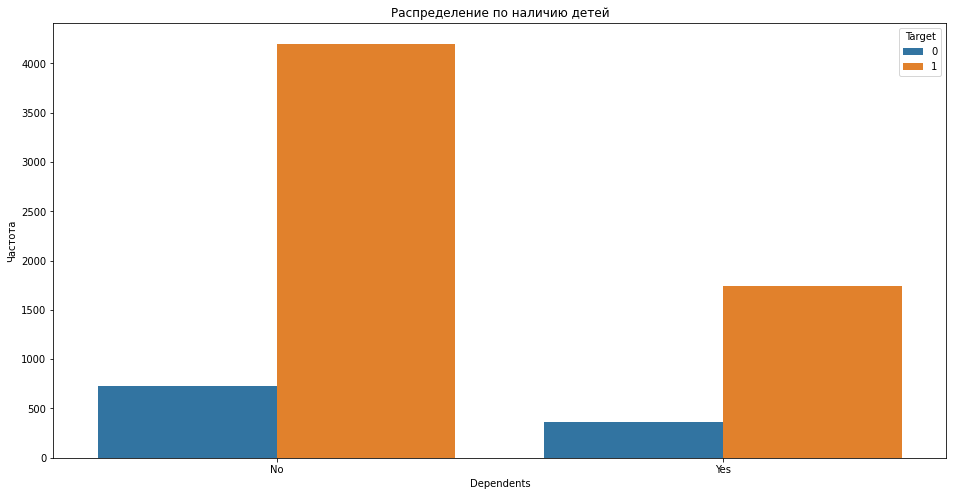

In [37]:
plt.figure(figsize=(16,8))
sns.countplot(data=data,x='Dependents',hue='Target')
plt.ylabel('Частота')
plt.xlabel('Dependents')
plt.title(f'Распределение по наличию детей')
plt.show();

Разницы практически не видно

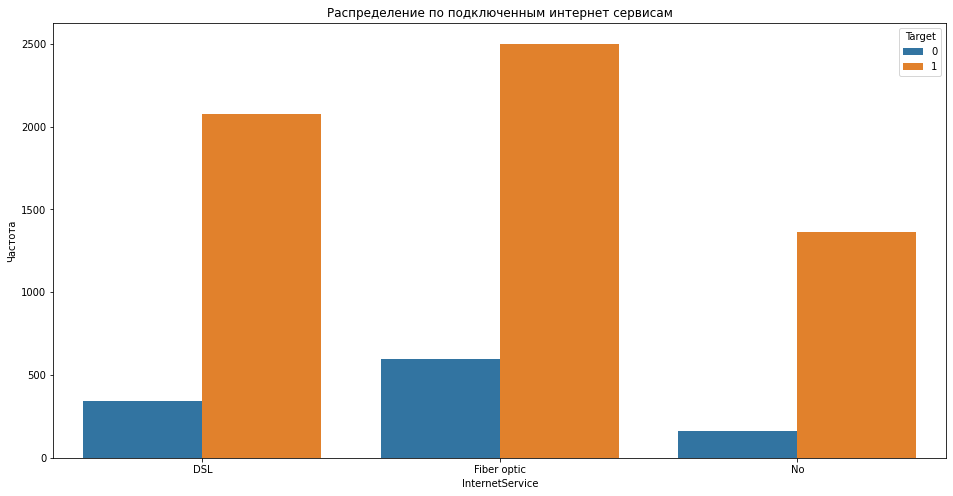

In [38]:
plt.figure(figsize=(16,8))
sns.countplot(data=data,x='InternetService',hue='Target')
plt.ylabel('Частота')
plt.xlabel('InternetService')
plt.title(f'Распределение по подключенным интернет сервисам')
plt.show();

Процент ухода примерно равен

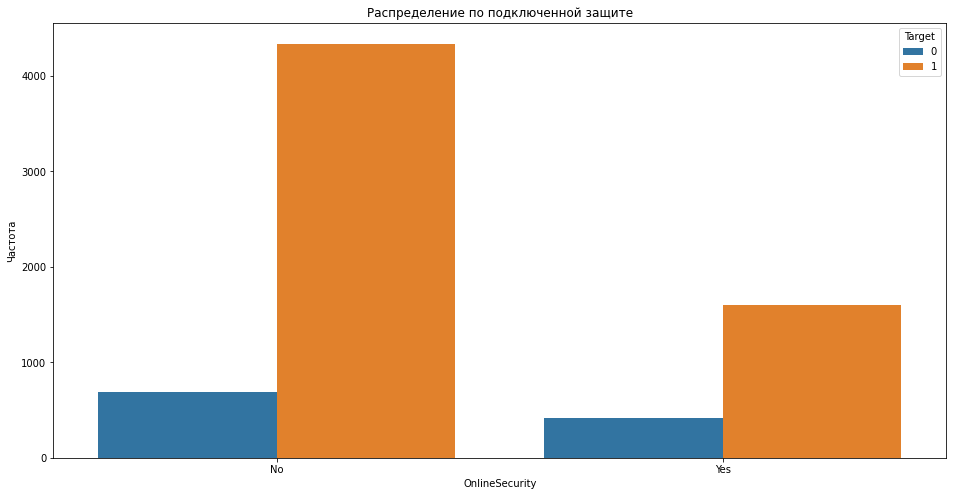

In [39]:
plt.figure(figsize=(16,8))
sns.countplot(data=data,x='OnlineSecurity',hue='Target')
plt.ylabel('Частота')
plt.xlabel('OnlineSecurity')
plt.title(f'Распределение по подключенной защите')
plt.show();

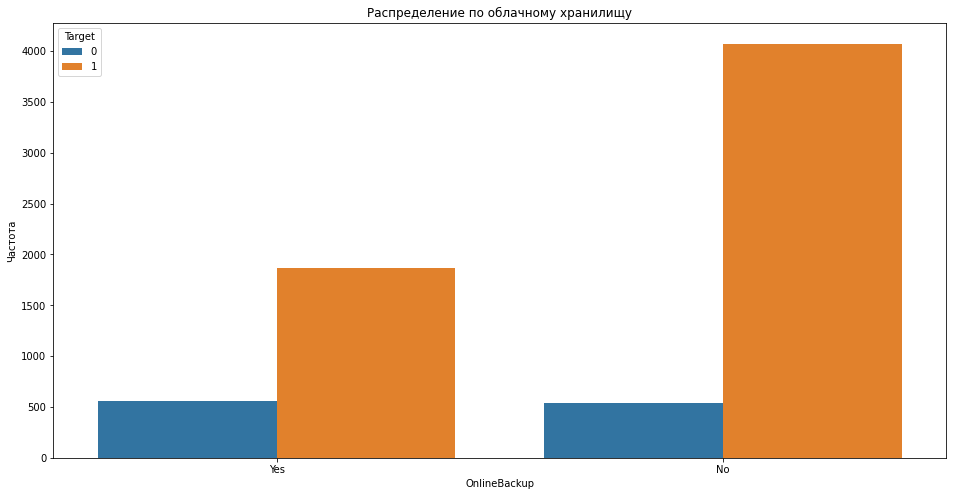

In [40]:
plt.figure(figsize=(16,8))
sns.countplot(data=data,x='OnlineBackup',hue='Target')
plt.ylabel('Частота')
plt.xlabel('OnlineBackup')
plt.title(f'Распределение по облачному хранилищу')
plt.show();

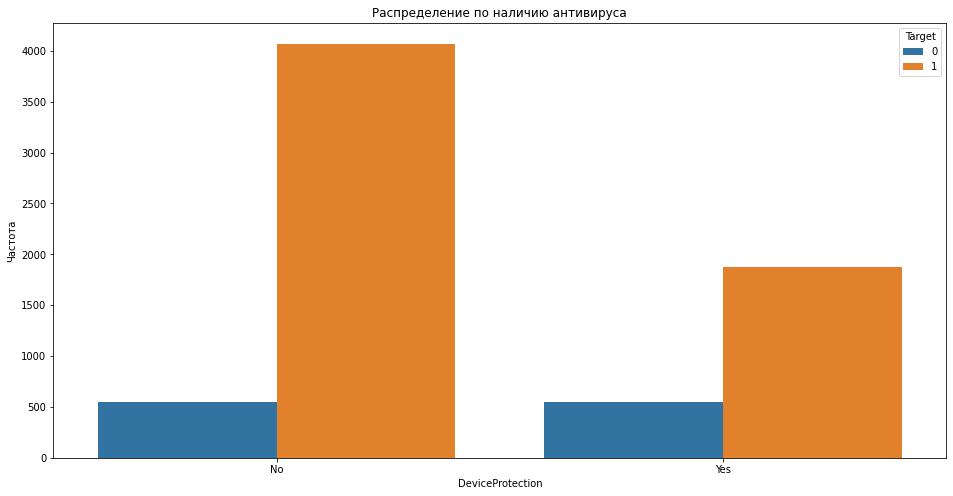

In [41]:
plt.figure(figsize=(16,8))
sns.countplot(data=data,x='DeviceProtection',hue='Target')
plt.ylabel('Частота')
plt.xlabel('DeviceProtection')
plt.title(f'Распределение по наличию антивируса')
plt.show();

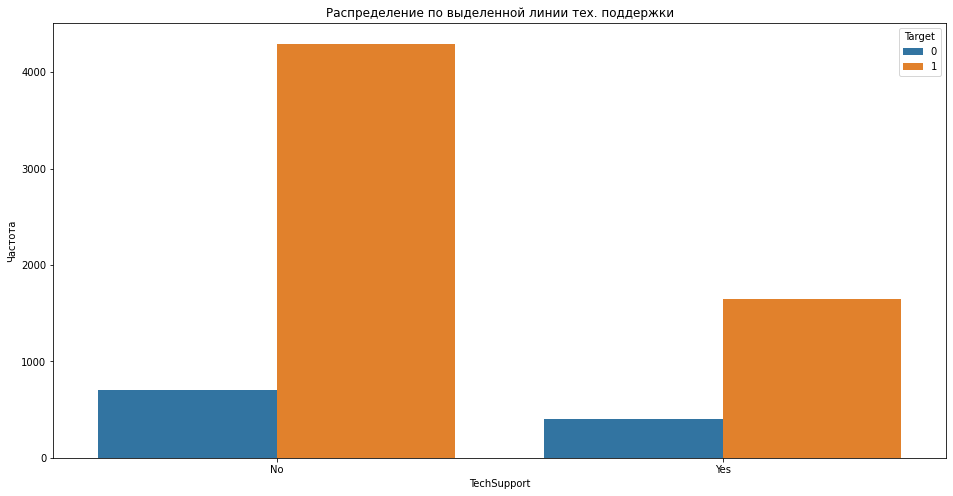

In [42]:
plt.figure(figsize=(16,8))
sns.countplot(data=data,x='TechSupport',hue='Target')
plt.ylabel('Частота')
plt.xlabel('TechSupport')
plt.title(f'Распределение по выделенной линии тех. поддержки')
plt.show();

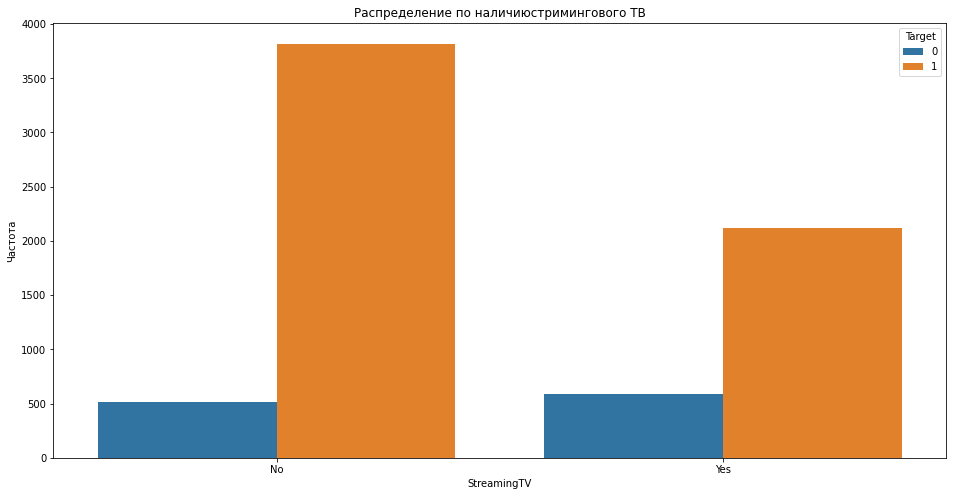

In [43]:
plt.figure(figsize=(16,8))
sns.countplot(data=data,x='StreamingTV',hue='Target')
plt.ylabel('Частота')
plt.xlabel('StreamingTV')
plt.title(f'Распределение по наличиюстримингового ТВ')
plt.show();

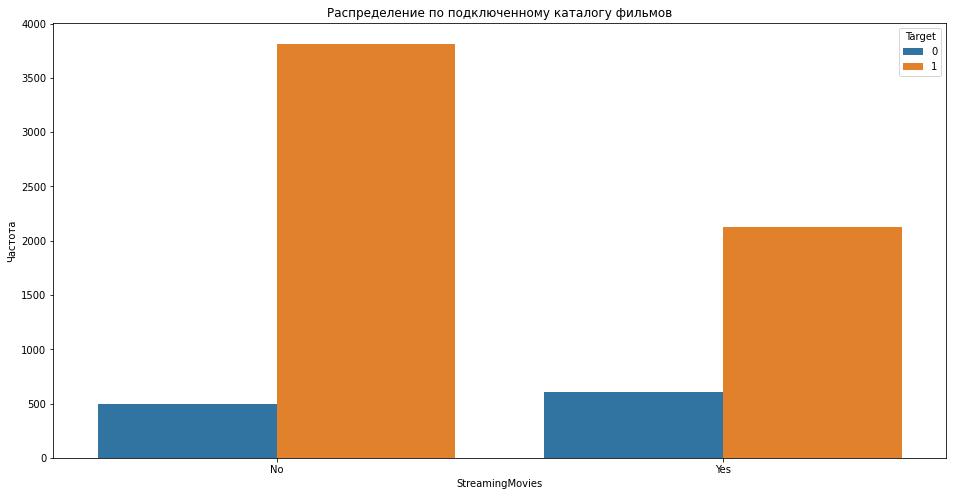

In [44]:
plt.figure(figsize=(16,8))
sns.countplot(data=data,x='StreamingMovies',hue='Target')
plt.ylabel('Частота')
plt.xlabel('StreamingMovies')
plt.title(f'Распределение по подключенному каталогу фильмов')
plt.show();

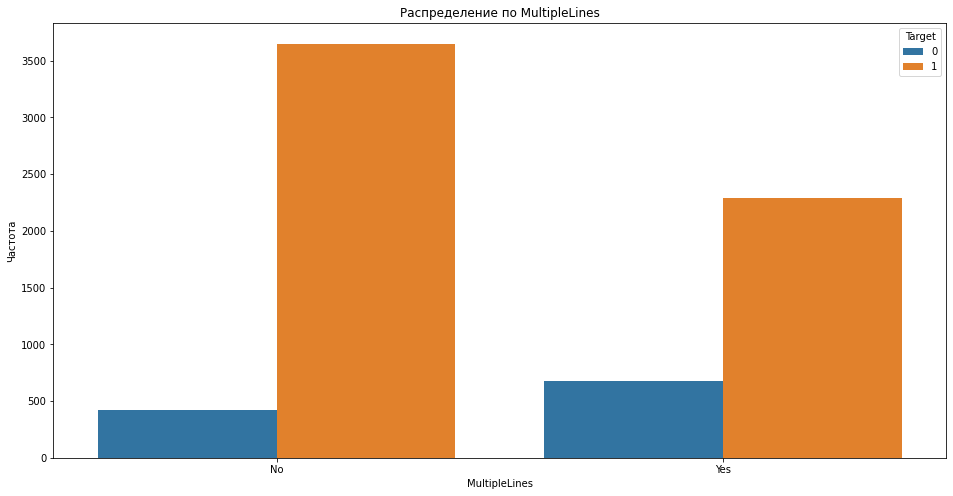

In [45]:
plt.figure(figsize=(16,8))
sns.countplot(data=data,x='MultipleLines',hue='Target')
plt.ylabel('Частота')
plt.xlabel('MultipleLines')
plt.title(f'Распределение по MultipleLines')
plt.show();

По услугам в целом, в общем то это и следовало из корреляции заметной зависмости нет.

Для работы с категориальными признаками используем phik. Перед этим можно преобразовать Target

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float32       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   object        
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

Для работы с категориальными признаками используем phik. Перед этим можно преобразовать Target.

In [47]:
data['Target'] = data['Target'].astype('object')

In [48]:
res_phik = data.drop(['customerID', 'EndDate','MonthlyCharges','Duration','TotalCharges','BeginDate'], axis=1).phik_matrix()
res_phik

,Type,PaperlessBilling,PaymentMethod,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Target
Type,1.000000,0.106860,0.277462,0.000000,0.086231,0.179736,0.147680,0.505187,0.152145,0.098884,0.137610,0.179999,0.066961,0.069608,0.065498,0.094015
PaperlessBilling,0.106860,1.000000,0.370495,0.000000,0.242133,0.013218,0.172593,0.231438,0.000000,0.196443,0.160796,0.055929,0.343524,0.325551,0.252972,0.083398
PaymentMethod,0.277462,0.370495,1.000000,0.000000,0.292725,0.243008,0.224903,0.323886,0.262911,0.282475,0.306866,0.272101,0.377209,0.378907,0.339313,0.214832
gender,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.018397,0.009882,0.000000,0.000000,0.000000,0.000000,0.000000,0.008581
SeniorCitizen,0.086231,0.242133,0.292725,0.000000,1.000000,0.016992,0.324576,0.160702,0.057028,0.102065,0.090686,0.092565,0.163120,0.186141,0.221313,0.086159
Partner,0.179736,0.013218,0.243008,0.000000,0.016992,1.000000,0.652122,0.000000,0.221673,0.219223,0.238079,0.185993,0.193258,0.182011,0.220101,0.226688
Dependents,0.147680,0.172593,0.224903,0.000000,0.324576,0.652122,1.000000,0.108463,0.124945,0.031533,0.010416,0.096912,0.017331,0.058999,0.033103,0.046871
InternetService,0.505187,0.231438,0.323886,0.000000,0.160702,0.000000,0.108463,1.000000,0.241421,0.233602,0.232916,0.239663,0.272818,0.272782,0.225383,0.056621
OnlineSecurity,0.152145,0.000000,0.262911,0.018397,0.057028,0.221673,0.124945,0.241421,1.000000,0.430425,0.418474,0.528391,0.272186,0.289097,0.151886,0.132594
OnlineBackup,0.098884,0.196443,0.282475,0.009882,0.102065,0.219223,0.031533,0.233602,0.430425,1.000000,0.458211,0.445130,0.428007,0.417170,0.311403,0.229482


In [49]:
res_phik['Target'].sort_values(ascending=False)

Target              1.000000
MultipleLines       0.261237
OnlineBackup        0.229482
Partner             0.226688
StreamingMovies     0.222232
DeviceProtection    0.218380
PaymentMethod       0.214832
StreamingTV         0.200198
OnlineSecurity      0.132594
TechSupport         0.103652
Type                0.094015
SeniorCitizen       0.086159
PaperlessBilling    0.083398
InternetService     0.056621
Dependents          0.046871
gender              0.008581
Name: Target, dtype: float64

Более точный расчет говорит о том, что зависимость имеется хоть и не явно выраженная.
* Duration (0,28)         
* MultipleLines (0,26) 
* TotalCharges (0,23)   
* OnlineBackup (0,23)       
* Partner (0,23)
* StreamingMovies (0,22)     
* DeviceProtection (0,22)   
* StreamingTV (0,2)        
Сильнее всего коррелируют с целевым признаком.


### Вывод по исследовательскому анализу

Данные практически не избыточны, прямых зависимостей не наблюдается.
* Можно избависться от столбца gender т.к. он абсолютно не связан с целью изучения.
* Так же для обучения модели столбцы EndDate и BeginDate   тоже не понадобятся.

## Выбор и обучение модели

### Подготовка и разделение данных для обучения модели

Сначала оценим дисбаланс классов

In [50]:
RANDOM_STATE = 310723

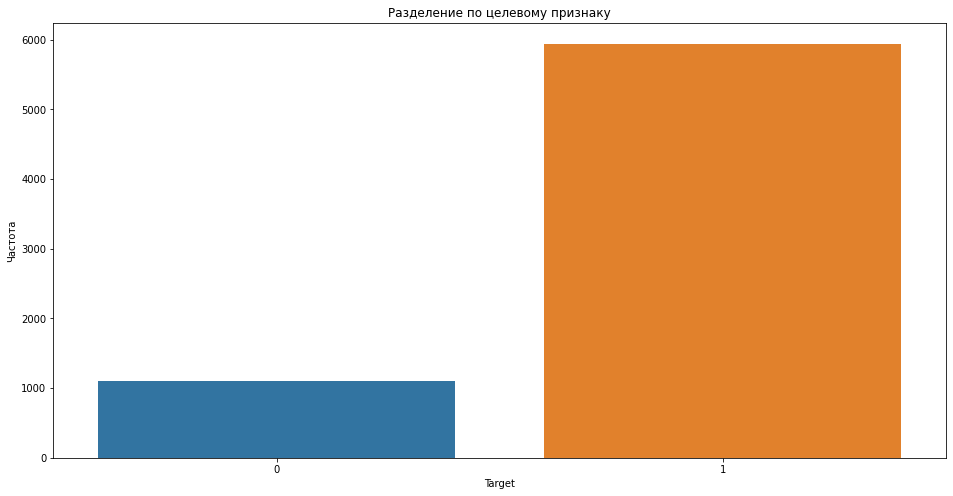

[84.36745705 15.63254295]
1    5942
0    1101
Name: Target, dtype: int64


In [51]:
plt.figure(figsize=(16,8))
sns.countplot(data=data,x='Target')
plt.ylabel('Частота')
plt.xlabel('Target')
plt.title(f'Разделение по целевому признаку')
plt.show();

abs_values = data['Target'].value_counts(ascending=False)
rel_values = data['Target'].value_counts(ascending=False, normalize=True).values * 100
print(rel_values)
print(abs_values)

Дисбаланс сильно выражен, почти 1 к 6.

Приступим к разделению данных

In [52]:
features_data = data.drop(['Target','EndDate','BeginDate','gender','customerID'], axis=1)
target_data = data['Target']




Для дальнейшей работы(LR и RF) преобразуем данные, перед этим разделим(выделим) числовые и категориальные признаки.

In [53]:
features_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float32
 5   SeniorCitizen     7043 non-null   object 
 6   Partner           7043 non-null   object 
 7   Dependents        7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  MultipleLines     7043 non-null   object 
 16  Duration          7043 non-null   int64  


Все категориальные признаки имеют тип object, напишем цикл и по нему отберем.

In [54]:
cat_col = []
num_col = []

In [55]:
for i in features_data.columns:
    if features_data[i].dtype == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)

In [56]:
cat_col

['Type',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'MultipleLines']

In [57]:
num_col

['MonthlyCharges', 'TotalCharges', 'Duration']

In [58]:
features_train, features_test, target_train, target_test = train_test_split(features_data, target_data, test_size=.25, 
                                                                            random_state=RANDOM_STATE)

Можно переходить к OHE

In [59]:
features_data

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Duration
0,Month-to-month,Yes,Electronic check,29.85,31.040001,0,Yes,No,DSL,No,Yes,No,No,No,No,No,31
1,One year,No,Mailed check,56.95,2071.840088,0,No,No,DSL,Yes,No,Yes,No,No,No,No,1036
2,Month-to-month,Yes,Mailed check,53.85,226.169998,0,No,No,DSL,Yes,Yes,No,No,No,No,No,123
3,One year,No,Bank transfer (automatic),42.30,1960.599976,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,1371
4,Month-to-month,Yes,Electronic check,70.70,353.500000,0,No,No,Fiber optic,No,No,No,No,No,No,No,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,One year,Yes,Mailed check,84.80,2035.199951,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,730
7039,One year,Yes,Credit card (automatic),103.20,7430.399902,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,2191
7040,Month-to-month,Yes,Electronic check,29.60,325.600006,0,Yes,Yes,DSL,Yes,No,No,No,No,No,No,337
7041,Month-to-month,Yes,Mailed check,74.40,520.799988,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,215


In [60]:
scaler = StandardScaler()

features_train_lr = pd.get_dummies(features_train[cat_col], drop_first=True)
features_test_lr = pd.get_dummies(features_test[cat_col], drop_first=True)

features_train_lr[num_col] = scaler.fit_transform(features_train[num_col])
features_test_lr[num_col] = scaler.transform(features_test[num_col])

encoder = OrdinalEncoder()
features_train[cat_col] = encoder.fit_transform(features_train[cat_col])
features_test[cat_col] = encoder.fit_transform(features_test[cat_col])

In [88]:
features_train_lr_ohe = features_train
features_test_lr_ohe = features_test
encoder_ohe = OneHotEncoder(handle_unknown='ignore', drop = 'first')
scaler = StandardScaler()

encoder_ohe.fit(features_train_lr_ohe[cat_col])
features_train_lr_ohe[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train_lr_ohe[cat_col]).toarray()
features_train_lr_ohe = features_train_lr_ohe.drop(cat_col, axis=1)
features_train_lr_ohe[num_col] = scaler.fit_transform(features_train_lr_ohe[num_col])

features_test_lr_ohe[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_test_lr_ohe[cat_col]).toarray()
features_test_lr_ohe = features_test_lr_ohe.drop(cat_col, axis=1)
features_test_lr_ohe[num_col] = scaler.transform(features_test_lr_ohe[num_col])

In [89]:
features_train_lr_ohe

,MonthlyCharges,TotalCharges,Duration,Type_1.0,Type_2.0,PaperlessBilling_1.0,PaymentMethod_1.0,PaymentMethod_2.0,PaymentMethod_3.0,SeniorCitizen_1.0,...,Dependents_1.0,InternetService_1.0,InternetService_2.0,OnlineSecurity_1.0,OnlineBackup_1.0,DeviceProtection_1.0,TechSupport_1.0,StreamingTV_1.0,StreamingMovies_1.0,MultipleLines_1.0
3760,0.300493,-0.898747,-1.188575,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3220,0.423485,-0.201311,-0.384094,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
3648,0.850630,1.181470,0.956219,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
6713,1.041766,-0.365581,-0.698252,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
5175,-1.469585,-0.810250,-0.428135,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5303,-0.801442,-0.119150,0.599487,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1166,-0.357676,-0.870725,-1.099025,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3064,0.135951,-0.304803,-0.382626,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4977,-1.454626,-0.745076,-0.251971,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
features_test_lr_ohe

,MonthlyCharges,TotalCharges,Duration,Type_1.0,Type_2.0,PaperlessBilling_1.0,PaymentMethod_1.0,PaymentMethod_2.0,PaymentMethod_3.0,SeniorCitizen_1.0,...,Dependents_1.0,InternetService_1.0,InternetService_2.0,OnlineSecurity_1.0,OnlineBackup_1.0,DeviceProtection_1.0,TechSupport_1.0,StreamingTV_1.0,StreamingMovies_1.0,MultipleLines_1.0
2675,-1.457950,-0.806924,-0.431071,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4540,-1.449640,-0.993731,-1.278125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2314,0.953677,2.187323,1.892823,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3467,0.892182,-0.573629,-0.918457,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
85,1.154785,-0.578933,-0.918457,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,-0.296181,-0.210213,0.018147,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6577,0.278887,1.423315,1.806209,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
3978,0.868913,-0.874365,-1.188575,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
562,0.170854,-0.764842,-1.008007,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [94]:
features_test_lr.shape, features_train_lr.shape

((1761, 21), (5282, 21))

In [95]:
features_test_lr

,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,...,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes,MonthlyCharges,TotalCharges,Duration
2675,0,1,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,-1.457950,-0.806924,-0.431071
4540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1.449640,-0.993731,-1.278125
2314,0,1,1,0,0,0,0,1,1,0,...,1,1,1,1,1,1,1,0.953677,2.187323,1.892823
3467,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,0.892182,-0.573629,-0.918457
85,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,1,1,1,1.154785,-0.578933,-0.918457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,0,1,1,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,-0.296181,-0.210213,0.018147
6577,0,1,0,0,0,0,0,1,0,0,...,0,1,1,1,1,0,1,0.278887,1.423315,1.806209
3978,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,1,0,0.868913,-0.874365,-1.188575
562,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,1,0,0.170854,-0.764842,-1.008007


In [96]:
features_data, features_test

(                Type PaperlessBilling              PaymentMethod  \
 0     Month-to-month              Yes           Electronic check   
 1           One year               No               Mailed check   
 2     Month-to-month              Yes               Mailed check   
 3           One year               No  Bank transfer (automatic)   
 4     Month-to-month              Yes           Electronic check   
 ...              ...              ...                        ...   
 7038        One year              Yes               Mailed check   
 7039        One year              Yes    Credit card (automatic)   
 7040  Month-to-month              Yes           Electronic check   
 7041  Month-to-month              Yes               Mailed check   
 7042        Two year              Yes  Bank transfer (automatic)   
 
       MonthlyCharges  TotalCharges SeniorCitizen Partner Dependents  \
 0              29.85     31.040001             0     Yes         No   
 1              56.95   20

In [97]:
target_train = target_train.astype('int')
target_test = target_test.astype('int')

### Выбор модели

Рассмотрим 3 модели, сразу воспользуемся GridSearchCV.

<b>LogisticRegression</b>

In [104]:
features_train

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,...,Dependents_1.0,InternetService_1.0,InternetService_2.0,OnlineSecurity_1.0,OnlineBackup_1.0,DeviceProtection_1.0,TechSupport_1.0,StreamingTV_1.0,StreamingMovies_1.0,MultipleLines_1.0
3760,0.0,1.0,1.0,73.60,220.800003,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3220,2.0,0.0,1.0,77.30,1688.229980,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
3648,1.0,1.0,2.0,90.15,4597.649902,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
6713,0.0,1.0,2.0,95.90,1342.599976,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
5175,1.0,0.0,3.0,20.35,407.000000,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5303,0.0,1.0,2.0,40.45,1861.099976,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1166,0.0,1.0,2.0,53.80,279.760010,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3064,0.0,1.0,2.0,68.65,1470.479980,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4977,1.0,1.0,1.0,20.80,544.130005,0.0,1.0,1.0,2.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
lr_model = LogisticRegression(random_state=RANDOM_STATE)
parameters = {'solver': ['newton-cg', 'lbfgs'],
              'max_iter':[100,300,900],
              'C':[1, 10, 100]}

lr_model = GridSearchCV(estimator = lr_model, param_grid = parameters,scoring = 'roc_auc',cv = 5)
lr_model.fit(features_train_lr, target_train)
lr_model.best_score_

0.7621992371663977

In [99]:
lr_modell = LogisticRegression(random_state=RANDOM_STATE)
parameters = {'solver': ['newton-cg', 'lbfgs'],
              'max_iter':[100,300,900],
              'C':[1, 10, 100]}

lr_modell = GridSearchCV(estimator = lr_modell, param_grid = parameters,scoring = 'roc_auc',cv = 5)
lr_modell.fit(features_train_lr_ohe, target_train)
lr_modell.best_score_

0.7695564178573646

Кодирование c помощью OneHotEncoder повысило результат, но незначительно

In [137]:
rf_model = RandomForestClassifier(random_state=RANDOM_STATE)
parameters = {'n_estimators': [25, 50, 100, 150],
 'criterion': ['gini', 'entropy'],
 'max_depth': [5, 10, 20]}
rf_model = GridSearchCV(rf_model,parameters,scoring = 'roc_auc',cv = 5)
rf_model.fit(features_train, target_train)
rf_model.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 150}

In [138]:
rf_model.best_score_

0.8290667779087855

In [63]:
cb_model = CatBoostClassifier(random_state=RANDOM_STATE)
parameters = {'depth':[1,5,10],
          'iterations':[250,100],
          'learning_rate':[0.01,0.1],
          'loss_function': ['Logloss', 'CrossEntropy']}        

cb_model = GridSearchCV(cb_model,parameters,scoring = 'roc_auc',cv = 5)
cb_model.fit(features_train, target_train)


0:	learn: 0.6868985	total: 53.2ms	remaining: 13.2s
1:	learn: 0.6807703	total: 54.3ms	remaining: 6.73s
2:	learn: 0.6748609	total: 55ms	remaining: 4.53s
3:	learn: 0.6693878	total: 55.8ms	remaining: 3.43s
4:	learn: 0.6638589	total: 56.9ms	remaining: 2.79s
5:	learn: 0.6583112	total: 57.7ms	remaining: 2.34s
6:	learn: 0.6532208	total: 58.3ms	remaining: 2.02s
7:	learn: 0.6474944	total: 59.2ms	remaining: 1.79s
8:	learn: 0.6421288	total: 60.3ms	remaining: 1.62s
9:	learn: 0.6369219	total: 61.5ms	remaining: 1.48s
10:	learn: 0.6318132	total: 66.5ms	remaining: 1.45s
11:	learn: 0.6271174	total: 67.4ms	remaining: 1.34s
12:	learn: 0.6222661	total: 68.4ms	remaining: 1.25s
13:	learn: 0.6175166	total: 72.6ms	remaining: 1.22s
14:	learn: 0.6129758	total: 73.7ms	remaining: 1.15s
15:	learn: 0.6084211	total: 74.7ms	remaining: 1.09s
16:	learn: 0.6039376	total: 78.9ms	remaining: 1.08s
17:	learn: 0.5996333	total: 79.8ms	remaining: 1.03s
18:	learn: 0.5956828	total: 80.7ms	remaining: 981ms
19:	learn: 0.5914949	tot

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f37ee9fa940>,
             param_grid={'depth': [1, 5, 10], 'iterations': [250, 100],
                         'learning_rate': [0.01, 0.1],
                         'loss_function': ['Logloss', 'CrossEntropy']},
             scoring='roc_auc')

In [64]:
cb_model.best_score_

0.8847209369288909

Выбираем CatBoost модель, посмотрим параметры.

In [65]:
cb_model.best_params_

{'depth': 5,
 'iterations': 250,
 'learning_rate': 0.1,
 'loss_function': 'Logloss'}

## Тестирование модели

### Проверка результатов

<Figure size 432x288 with 0 Axes>

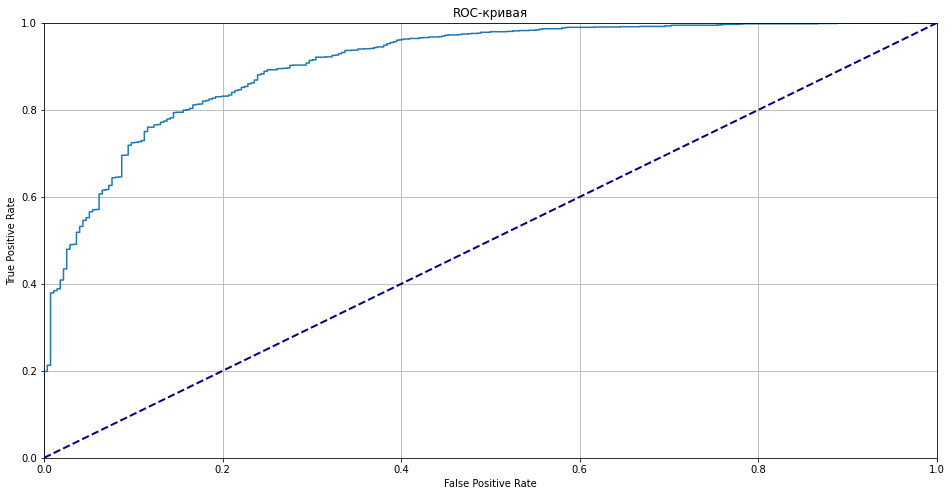

In [66]:
probabilities= cb_model.predict_proba(features_test)
probabilities_one = probabilities[:, 1]
predict = cb_model.predict(features_test)
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one) 
plt.figure()
# < постройте график >
plt.figure(figsize=(16, 8))
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.grid()
plt.show()

In [67]:
fnl=pd.DataFrame(columns=['roc_auc','accuracy','f1_score'],
                 data=[[roc_auc_score(target_test,probabilities_one),
                        accuracy_score(target_test,predict),
                        f1_score(target_test,predict),]])

In [68]:
fnl

,roc_auc,accuracy,f1_score
0,0.907267,0.900057,0.943226


Результаты отличные, очевидно что модель справляется лучше "Глупой модели".

### Анализ важности признаков

In [69]:
importance = cb_model.best_estimator_.feature_importances_
importance

array([ 9.2781271 ,  1.25091526,  4.49998184,  9.83875367, 11.16630878,
        0.67853383,  3.22756526,  1.20013083,  2.61681795,  1.56355968,
        2.60506673,  1.38124953,  0.82685662,  1.04754473,  1.09557026,
        3.2276405 , 44.49537742])

Не особо понятно, построим график

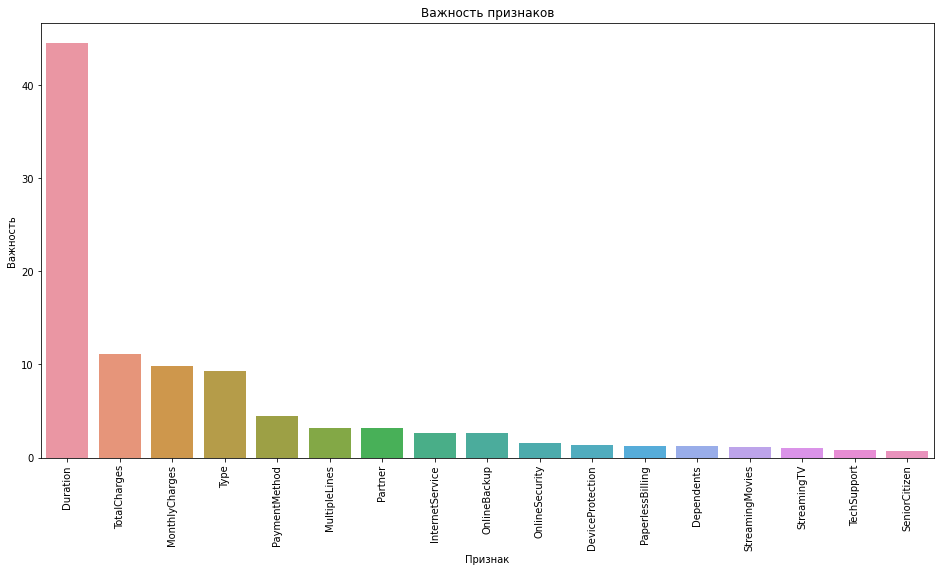

In [70]:
import_info = pd.DataFrame(data={
          'Attribute': features_train.columns,
          'Importance':importance
      })
import_info = import_info.sort_values(by='Importance', ascending=False)
plt.figure(figsize = (16,8))
sns.barplot(x=import_info['Attribute'], y=import_info['Importance'])
plt.title('Важность признаков')
plt.xticks(rotation='vertical')
plt.xlabel('Признак')
plt.ylabel('Важность')
plt.show();

Как и ожидалось по корреляции Duration, TotalCharges наиболее важными.
MonthlyCharges наоборот в корреляции не прослеживался, а оказался не менее важным. 

### Матрица ошибок

In [71]:
cm = confusion_matrix(target_test,predict)
cm

array([[ 123,  153],
       [  23, 1462]])

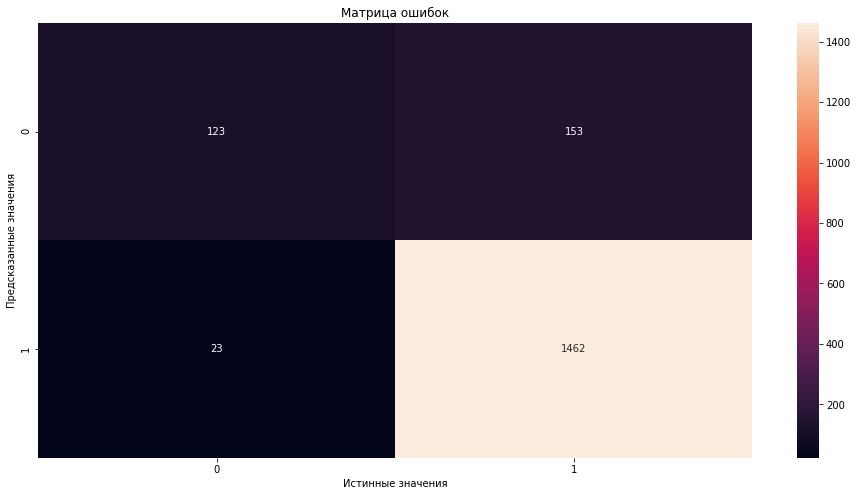

In [72]:
labels = np.unique(target_test)
plt.figure(figsize = (16,8))
sns.heatmap(cm, xticklabels=labels,yticklabels=labels,annot=True, fmt='.0f')
plt.title('Матрица ошибок')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.show();

Дисбаланс сильно сказывается, но в целом все хорошо, раздал 153 лишних промокодов, и потерял 23 клиентов.

## Отчет по проделанной работе

### Какие пункты плана были выполнены, а какие — нет. Почему?

<b>1. Описать предметную область</b>
 
 Данный пункт плана был выполнен без дополнительных поправок

<b>2. Ознакомление с данными</b>
 
 Так же полностью выполнен, после консультации был добавлен дополнительный признак Duration(продолжительность действия договора)

<b>3. Проведение исследовательского анализа данных</b>
 
 Выполнен полностью, после консультации добавлена оценка корреляции признаков с помощью phik

<b>4. Выбор и обучение модели</b>

Подготовка и разделение данных для обучения была расширена, данные для модели Логистической Регрессии были закодированны двумя способами с помощью OneHotEncoder и pd.get_dummies 

Подбор модели прошел как и планировалось
 


<b>5. Тестирование модели</b>
 
Оценка результатов выбранной для работы модели была проведена в соответствии с планом, к счастью предварительно проделанная работа позволила сразу получить высокие результаты, и дополнительной работы проводить не пришлось

### Какие трудности возникли и как вы их преодолели?

Преобразование признаков для ЛР вызвало некоторые проблемы, но с помощью тимлида их получилось преодолеть(спасибо)

### Какие ключевые шаги в решении задачи вы выделили?

Думаю самыми важными шагами можно назвать:
* Оценку имеющихся данных, оценка и извлечение необходимых данных для обучения

* Подготовку данных для обучения (выбор целевого признака, создание новых, кодирование и маштабирование) - от результата данной работы в основе своей и зависит результат всего проекта

* Выбор модели и ее гиперпараметров, важный этап работы, но благодаря GridSearchCV он не является особо трудоемким

### Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена?

<b>Выбор признаков</b>
В подборку данных для обучения вошли практически все признаки предоставленные в качестве входящих данных изначально, некоторые признаки были убраны поскольку от них никак не зависел целевой признак

Подрробнее:
* EndDate - BeginDate - были убраны за не надобностью, но были нуцжны для получения такого важного признака как Duration
* gender - при оценке признаков было решено, что пол никак не влияет на желание клиента уйти или остаться, поэтому для очисти данных от бесполезной информации было решено его убрать
* customerID - очевидно, что он id  клиента ничего не зависит

<b>Подготовка признаков</b>

Т.к. большинство признаков были категориальными было решено провести их кодировку с помощью OrdinalEncoder() и OneHotEncoder() в зависимости от типа модели, так же было проведено маштабирование  количественных признаков с помощью StandardScaler()


### Какая ваша итоговая модель, какие у неё гиперпараметы и какое качество?

<b>Модель</b>

Для дальнейшей работы была выбрана модель CatBoostClassifier с следущими гиперпараметрами(параметры подбирались с помощью GridSearchCV):
* depth: 5
* iterations: 250
* learning_rate: 0.1
* loss_function: 'Logloss'
* random_state: 310723

<b>Качество</b>
Для оченки качества были расчитаны следующие метрики:

* roc_auc: 0.907267
* accuracy 0.900057
* f1_score 0.943226

Данные результаты говорят о достаточно высоком качестве работы модели.


### Дополнительные результаты тестирования 

Так же для анализа работы модели был проведен анализ важности признаков и построена матрица ошибок модели

Наиболее важными для получения результата оказались 
* Duration(44.49537742)
* TotalCharges(11.16630878)
* MonthlyCharges (9.83875367)
* Type (9.2781271)

Оценка матрицы ошибок говорит о следующих результатах работы модели с тестовыми данными:
* Потенциальная потеря 23 клиентов (ушли, хотя модель предсказала обратное)
* 153 клиента были оценены как рисковые, то есть им были предложены дополнительные условия или промокоды, хотя уходить они не собирались
* 1462 клиента были оценены моделью как безрисковые, такими и оказались
* Со 123 тремя клиентами  модель предсказала верно и у компании появилась возможность провести с ними дополнительную работу, чтобы их не потерять
